## Preparing First Dataset, Cats and Dogs

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-09-05 19:45:12--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.183.91, 142.250.183.187, 142.250.199.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.183.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   302KB/s    in 2m 22s  

2023-09-05 19:47:35 (473 KB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [24]:
# Flow training images in batches of 20 using train_datagen generator
train_generator_cad = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(28, 28),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
train_generator_alex = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [25]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator_cad = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(28, 28),
        batch_size=20,
        class_mode='binary')
validation_generator_cad = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(28, 28),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [26]:
train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames.sort()
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


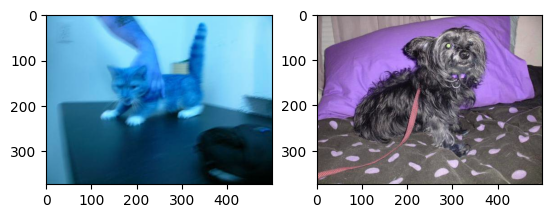

In [10]:
import matplotlib.pyplot as plt
import cv2

plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(os.path.join(train_dogs_dir, train_dog_fnames[0])))

## Preparing the second dataset Horse and Zebras

In [24]:
local_zip = 'archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [49]:
import tensorflow as tf
import keras

def LeNet(inputLayer):
    c1 = tf.keras.layers.Conv2D(filters = 6, kernel_size = (5, 5), activation = 'relu')(inputLayer)
    p1 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(p1)
    p2 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))(c2)

    f1 = tf.keras.layers.Flatten()(p2)
    d1 = tf.keras.layers.Dense(120, activation = 'relu')(f1)
    d2 = tf.keras.layers.Dense(84, activation = 'relu')(d1)
    output = tf.keras.layers.Dense(2, activation = 'softmax')(d2)
    
    model = tf.keras.Model(inputs = [inputLayer], outputs = [output])
    return model

In [50]:
inputLayer = tf.keras.layers.Input((28, 28, 3))
LeNetModel = LeNet(inputLayer)
LeNetModel.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [51]:
LeNetModel.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 6)         456       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 12, 12, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 256)               0   

In [52]:
history = LeNetModel.fit(train_generator_cad, epochs = 50, validation_data = validation_generator_cad)

Epoch 1/50
100/100 [==============================] - 3s 19ms/step - loss: 0.6911 - accuracy: 0.5340 - val_loss: 0.6814 - val_accuracy: 0.5510
Epoch 2/50
100/100 [==============================] - 2s 17ms/step - loss: 0.6701 - accuracy: 0.5935 - val_loss: 0.6538 - val_accuracy: 0.6060
Epoch 3/50
100/100 [==============================] - 2s 18ms/step - loss: 0.6512 - accuracy: 0.6100 - val_loss: 0.6437 - val_accuracy: 0.6230
Epoch 4/50
100/100 [==============================] - 2s 18ms/step - loss: 0.6130 - accuracy: 0.6735 - val_loss: 0.6526 - val_accuracy: 0.6070
Epoch 5/50
100/100 [==============================] - 2s 18ms/step - loss: 0.5800 - accuracy: 0.6975 - val_loss: 0.6360 - val_accuracy: 0.6320
Epoch 6/50
100/100 [==============================] - 2s 18ms/step - loss: 0.5447 - accuracy: 0.7210 - val_loss: 0.6496 - val_accuracy: 0.6510
Epoch 7/50
100/100 [==============================] - 2s 18ms/step - loss: 0.5050 - accuracy: 0.7435 - val_loss: 0.6534 - val_accuracy: 0.6710

KeyboardInterrupt: 

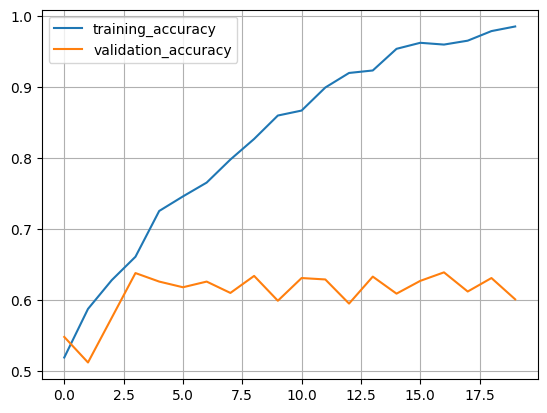

In [53]:
plt.plot(history.history['accuracy'], label = 'training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()
plt.grid(True)

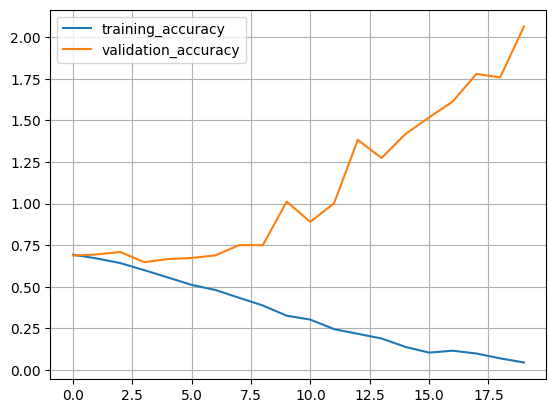

In [54]:
plt.plot(history.history['loss'], label = 'training_accuracy')
plt.plot(history.history['val_loss'], label = 'validation_accuracy')
plt.legend()
plt.grid(True)

In [ ]:
def LeNet(inputLayer):
    c1 = tf.keras.layers.Conv2D(filters = 6, kernel_size = (5, 5), activation = 'relu')(inputLayer)
    p1 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu')(p1)
    p2 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))(c2)

    f1 = tf.keras.layers.Flatten()(p2)
    d1 = tf.keras.layers.Dense(120, activation = 'relu')(f1)
    d2 = tf.keras.layers.Dense(84, activation = 'relu')(d1)
    output = tf.keras.layers.Dense(2, activation = 'softmax')(d2)
    
    model = tf.keras.Model(inputs = [inputLayer], outputs = [output])
    return model